In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\mikex\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
assets = ['TSLA','AAPL']
pf_data = pd.DataFrame()
start_date = '2019-1-1'
for a in assets:
    pf_data[a] = wb.DataReader(a,data_source='yahoo', start=start_date)['Adj Close']

In [3]:
pf_data.tail()

,TSLA,AAPL
Date,,
2020-09-09,366.279999,117.320000
2020-09-10,371.339996,113.489998
2020-09-11,372.720001,112.000000
2020-09-14,419.619995,115.360001
2020-09-15,449.760010,115.540001


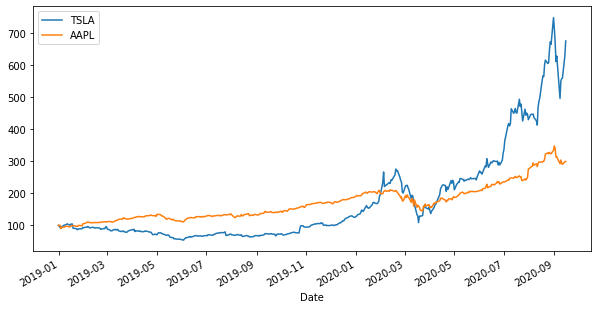

In [4]:
(pf_data/pf_data.iloc[0]*100).plot(figsize=(10, 5))

In [5]:
log_returns = np.log(pf_data/pf_data.shift(1))

In [6]:
log_returns.mean()*250

TSLA    1.110820
AAPL    0.637646
dtype: float64

In [7]:
log_returns.cov()*250

,TSLA,AAPL
TSLA,0.550455,0.132751
AAPL,0.132751,0.145564


In [8]:
log_returns.corr()

,TSLA,AAPL
TSLA,1.000000,0.468975
AAPL,0.468975,1.000000


In [9]:
num_assets = len(assets)
num_assets

2

In [10]:
arr = np.random.random(2)
arr

array([0.64585805, 0.5497056 ])

In [11]:
arr[0]+arr[1]

1.1955636425855647

In [12]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
# above means w1/(w1+w2) + w2/(w1+w2) = 1.0
weights

array([0.44912156, 0.55087844])

In [13]:
weights[0]+weights[1]

1.0

Expected Portfolio Return

In [14]:
np.sum(weights * log_returns.mean())*250

0.8501587420625111

Expected portfolio variance

In [15]:
np.dot(weights.T, np.dot(log_returns.cov()*250, weights))

0.2208944813082414

Expected portfolio volatility

In [16]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights)))

0.46999412901465204

In [17]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean())*250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights))))

pfolio_returns = np.array(pfolio_returns) 
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.94371051, 0.69763858, 0.78019916, 0.82847925, 0.83098773,
        0.75499984, 0.95853856, 0.84237038, 0.90017425, 0.9917505 ,
        0.93418696, 0.76488019, 0.98140747, 0.91816149, 0.99207711,
        0.83455335, 0.75886087, 0.87101356, 0.85440224, 0.9185081 ,
        1.00728842, 0.89312987, 0.94165504, 0.65248206, 0.8117298 ,
        0.81459172, 1.05586642, 0.94436505, 0.97231285, 0.81908597,
        0.89787092, 0.90089635, 0.80049578, 1.06785738, 1.09770136,
        0.72766479, 1.01981428, 1.04888654, 0.95620078, 0.97115458,
        1.04326959, 1.05493362, 0.86637311, 0.8844374 , 0.73823152,
        0.80773118, 0.88413217, 0.93446467, 0.95865095, 1.05023514,
        0.98763536, 0.91193153, 0.77768274, 0.92465825, 0.72751947,
        0.88502297, 1.00290564, 0.69249514, 0.94089331, 0.76419377,
        0.92380206, 0.87033014, 0.89835295, 0.8417143 , 0.97378511,
        0.91030892, 0.99584674, 1.08638633, 0.75037743, 0.69912082,
        0.93650672, 0.76541513, 0.76118731, 0.99

In [18]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [19]:
portfolios.head()

,Return,Volatility
0,0.943711,0.555980
1,0.697639,0.386310
2,0.780199,0.420617
3,0.828479,0.453050
4,0.830988,0.454941


In [20]:
portfolios.tail()

,Return,Volatility
995,0.965459,0.578311
996,0.648995,0.381047
997,0.731238,0.396659
998,0.884303,0.499191
999,0.761093,0.410099


Text(0, 0.5, 'Expected Return')

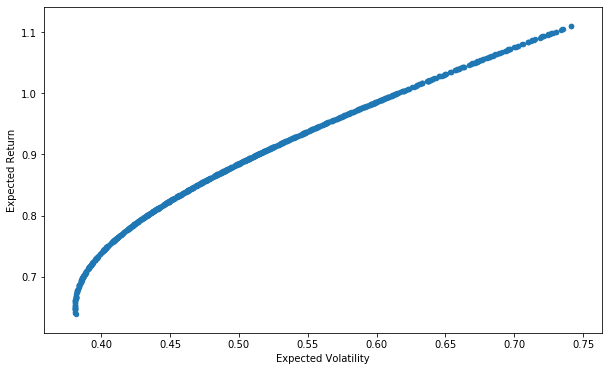

In [23]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')